# Part II - (Prosper Data Exploration)
## by (Olalekan Ayinde)

## Investigation Overview


> The overview goal of the investigation is to investigate factors that contribute to high 'LenderYield' and loan approvals.  
 


## Dataset Overview

> There are 113937 customers in the dataset with 81 features. 
We are focusing our exploration on about 10-15 features in the dataset. 
Most variables are numeric in nature, but the variable ProsperRating(Alpha)
 is an ordered factor variable with the corresponding numeric values captured in ProsperRating(Numeric). 
They have the following levels. (worst) ----> (best) 
ProsperRating(Alpha): HR, E, D, C, B, A, AA ProsperRating(Numeric): 1, 2, 3, 4, 5, 6, 7
Prosper as a company, considering the currency of this dataset (which was 2017), 
as 56,576 current loans that are running. About 38,074 ones have been completed, 5,018 defaulters while only 5 are cancelled.  


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_df = pd.read_csv('prosperLoanData.csv')

#make a copy of the prosper dataset
prosper = prosper_df.copy()

## Distribution of 'LoanStatus' in the dataset
> The visualization will explore the distribution of 'LoanStatus' in the dataset. This shows how many customer of the company are in different range of 'LoanStatus'. Prosper as a company, considering the currency of this dataset (which was 2017), as 56,576 current loans that are running. About 38,074 ones have been completed, 5,018 defaulters while only 5 are cancelled. 
> 
Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

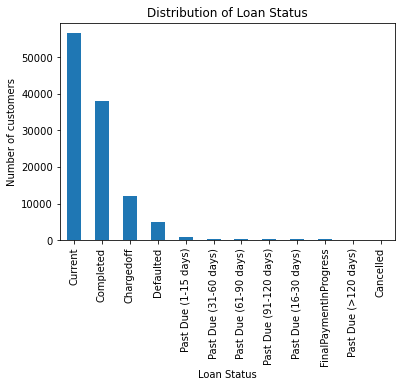

In [7]:
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of customers')
prosper['LoanStatus'].value_counts().plot(kind='bar');


## Distibution of 'LenderYield' in the dataset.
> The visualization will explore the distribution of 'LenderYield' in the dataset. This is a right skewed histogram. This means that the mean > median > mode. This means that average lender yield is greater that median for all lender yield, which implies that the lenders could have more prospect investing in Prosper as a company.
 

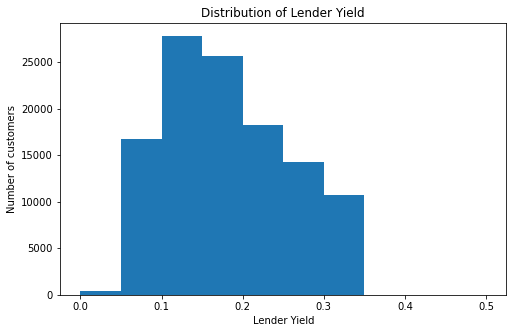

In [9]:
# start with a standard-scaled plot for LenderYield
binsize = 0.05
bins = np.arange(0, prosper['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'LenderYield', bins = bins)
plt.title('Distribution of Lender Yield')
plt.ylabel('Number of customers')
plt.xlabel('Lender Yield')
plt.show();

## Heatmap showing the correlation between the numeric variable of considerations.
> The visualization of heapmap for the correlation between the numeric values of consideration . As expected, a strong positive correlation exist between BorrowerAPR, LenderYield and EstimatedReturn. Borrower's APR, which is annual cost of a loan to a borrower-including fees, is dependent on the lender's yield and return on investment. The higher the borower's APR, the more money realised by the lenders. 

In [ ]:
numeric_vars = ['ProsperRating (numeric)', 'LenderYield', 'BorrowerAPR', 'EstimatedReturn', 'StatedMonthlyIncome', 'RevolvingCreditBalance', 'MonthlyLoanPayment']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'IncomeVerifiable']


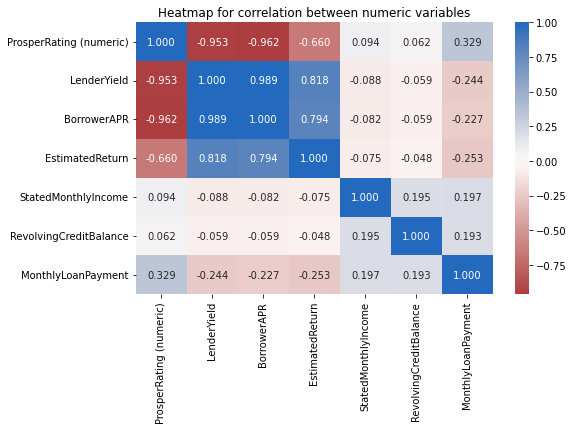

In [12]:
plt.figure(figsize = [8,5])
sb.heatmap(prosper[numeric_vars].corr(), annot = True, fmt = '.03f',
          cmap = 'vlag_r', center = 0)
plt.title('Heatmap for correlation between numeric variables')
plt.show();

## 'BorrowerAPR' vs 'LenderYield'
> This plot suggest the concativity of the relationship between 'BorrowerAPR' and 'LenderYield'. 


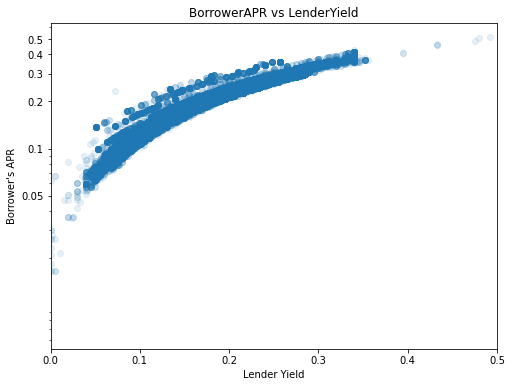

In [14]:
# Scatter plot of 'LenderYield' vs 'BorrowerAPR', with log transform on 'BorrowerAPR' axis
plt.figure(figsize = [8, 6])
plt.scatter(data = prosper, x = 'LenderYield', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, 0.5])
plt.xlabel('Lender Yield')
plt.yscale('log')
plt.yticks([0.05, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1], [0.05, '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.ylabel("Borrower\'s APR")
plt.title('BorrowerAPR vs LenderYield')
plt.show();

## 'EmploymentStatus', 'BorrowerAPR' and 'LoanStatus' for selected 'LenderYield'.
> Customers with 'Employed' and 'Full-time' EmploymentStatus have more 'Current' and 'Completed' LoanStatus. It is interesting to note that customers with 'Employed' EmploymentStatus have more 'Chargedoff' LoanStatus, this is expected for 'Not employed'.


In [18]:
# Select 'LenderYield' of approximately 0.2 (This could mean 20% yield for the investor)
yield_flag = (prosper['LenderYield'] >= 0.1999) & (prosper['LenderYield'] <= 0.2005)
yield_2c = prosper.loc[yield_flag,:]

# Select 'LenderYield' of approximately 0.05 (This could mean 5% yield for the investor)
yield_flag = (prosper['LenderYield'] >= 0.0499) & (prosper['LenderYield'] <= 0.0505)
yield_05c = prosper.loc[yield_flag,:]

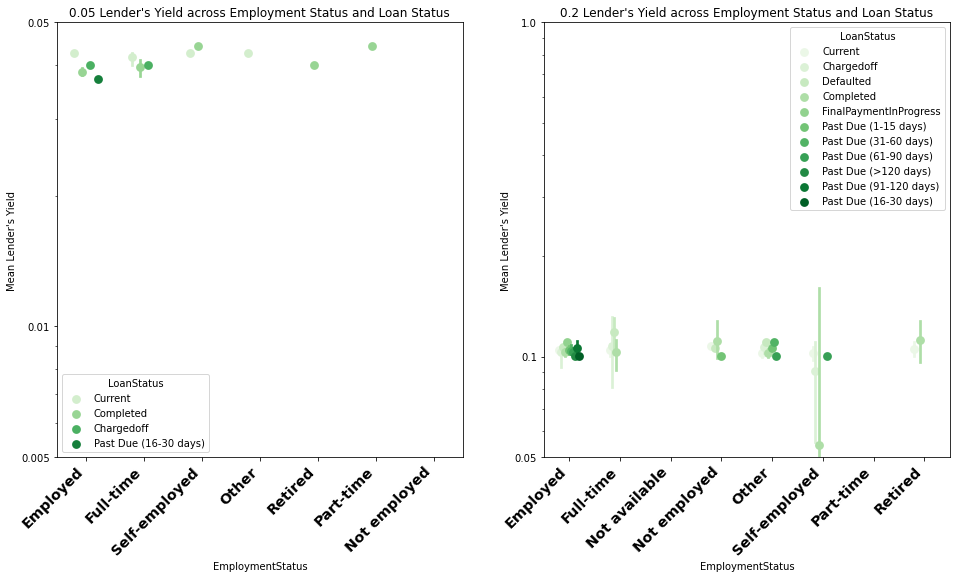

In [19]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,8])

c= sb.pointplot(data = yield_05c, x = 'EmploymentStatus', y = 'EstimatedReturn', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('0.05 Lender\'s Yield across Employment Status and Loan Status')
ax[0].set_ylabel('Mean Lender\'s Yield')
ax[0].set_yscale('log')
ax[0].set_yticks([0.005, 0.01, 0.05])
ax[0].set_yticklabels(['0.005', '0.01', '0.05'])
ax[0].set_yticklabels([],minor = True)
c.set_xticklabels(c.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large');

d = sb.pointplot(data = yield_2c, x = 'EmploymentStatus', y = 'EstimatedReturn', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('0.2 Lender\'s Yield across Employment Status and Loan Status')
ax[1].set_ylabel('Mean Lender\'s Yield')
ax[1].set_yscale('log')
ax[1].set_yticks([0.05, 0.1, 1.0])
ax[1].set_yticklabels(['0.05', '0.1', '1.0'])
ax[1].set_yticklabels([],minor = True)
d.set_xticklabels(d.get_xticklabels(), rotation = 45, horizontalalignment = 'right',
                        fontweight='bold',fontsize='x-large');
plt.show();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [20]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 